# TASK 1
## Prediction using Supervised ML

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: SWAPAN CHETRI

# Importing all required libraries

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# importing data

In [5]:
# importing data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# reading data

In [6]:
# printing the top 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# printing the last 5 rows of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
# printing no of rows and coulumns in the dataset
print(f"no of rows -> {df.shape[0]}")
print(f"no of columns -> {df.shape[1]}")

no of rows -> 25
no of columns -> 2


# Checking missing values in the dataset

In [14]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
df.describe().round(2)

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


# Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

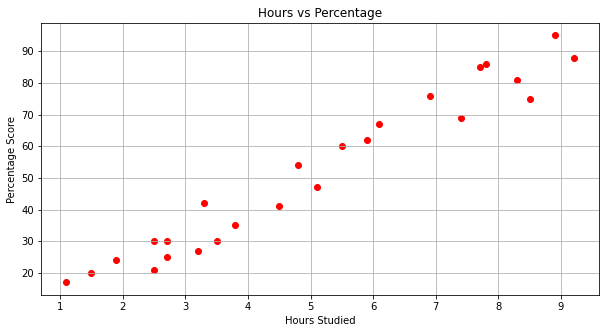

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Hours'], y=df['Scores'],color="red") 
plt.grid(True)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Preparing the data**

### -> The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [63]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### -> Now that we have our attributes and labels, the next step is to split this data into training and test sets.
### -> We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [100]:
#spliting our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2) 

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [101]:
#creating the instance of linear regression  
lr= LinearRegression()  

lr.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Finding Coefficient and Intercept

In [102]:
print("Coefficient is :",lr.coef_)
print("Intercept is : ",lr.intercept_)

Coefficient is : [10.42786752]
Intercept is :  -0.4416515935882117


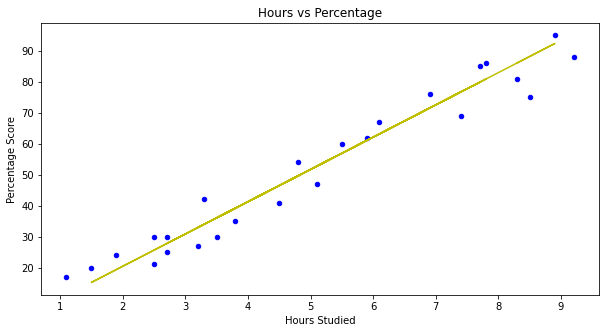

In [103]:
# Plotting the regression line
df.plot(x="Hours",y="Scores",color="b",kind="scatter",figsize=(10,5))
plt.plot(X_train,lr.coef_[0]*X_train+lr.intercept_,color="y")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Score')  
plt.show()

# **Making Predictions**
### Now that we have trained our algorithm, it's time to make some predictions.

In [104]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


In [105]:
# Comparing Actual vs Predicted
compare= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


# test with our own data

In [106]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 96.01612299632009


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


print("Mean Absolute Error: ",mean_absolute_error(y_pred, y_test))
print("mean sqared error: ",mean_squared_error(y_pred, y_test))
print("R2-score %.2f:"%r2_score(y_pred,y_test))

Mean Absolute Error:  5.936576124243742
mean sqared error:  44.426665487233365
R2-score 0.96:


# THANK YOU!!